In [104]:
import sys 
sys.path.append('../utils')

import numpy as np 
import matplotlib.pyplot as plt

from preprocess import gain

In [105]:
# data = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/stdata12/train_amplitude.npy'

data = '/local1/workspace/adl_seismic/data/stdata-12/stdata_12_amplitude.npy'

train = np.load(data)
train.shape

display(np.mean(train), np.std(train), np.min(train), np.max(train))

# clipping to remove outliers 
abs_max = np.quantile(np.abs(train), 0.99)
display('99th percentile of abs max', abs_max)

# clipping 
train_clip = np.clip(train, -abs_max, abs_max)

# min, max after clipping 
display("train min and max after clipping", np.min(train_clip), np.max(train_clip))

vmin_clip = np.min(train_clip)
vmax_clip =  np.max(train_clip)


-1.0966446

2520.2305

-28620.572

25043.0

'99th percentile of abs max'

8207.3701171875

'train min and max after clipping'

-8207.37

8207.37

## Creating a patch

(-0.5, 255.5, 240.5, -0.5)

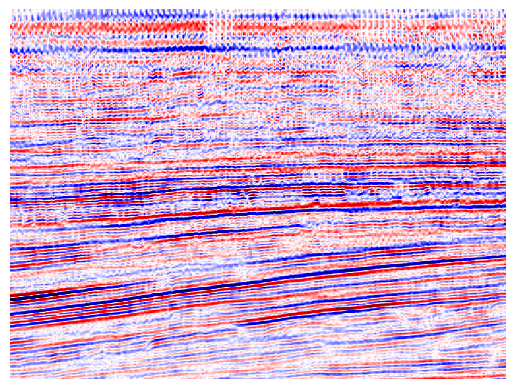

In [106]:


patch_size = 256

patch = train[0, 10 : 10 + 256, 15 : 256].T
vmin = np.min(patch)
vmax = np.max(patch)

plt.imshow(patch, cmap='seismic', aspect='auto', vmin=vmin_clip, vmax = vmax_clip)
plt.axis('off')

## Applying AGC

In [107]:
agc_windows = [patch_size / 2 , patch_size /  4 , patch_size / 8, patch_size/16, patch_size/32 ]

patch_agc = [gain(patch, 2e-3 , 'agc', window_size * (2e-3), 2) for window_size in agc_windows]

In [108]:
patch_agc[0].shape

(241, 256)

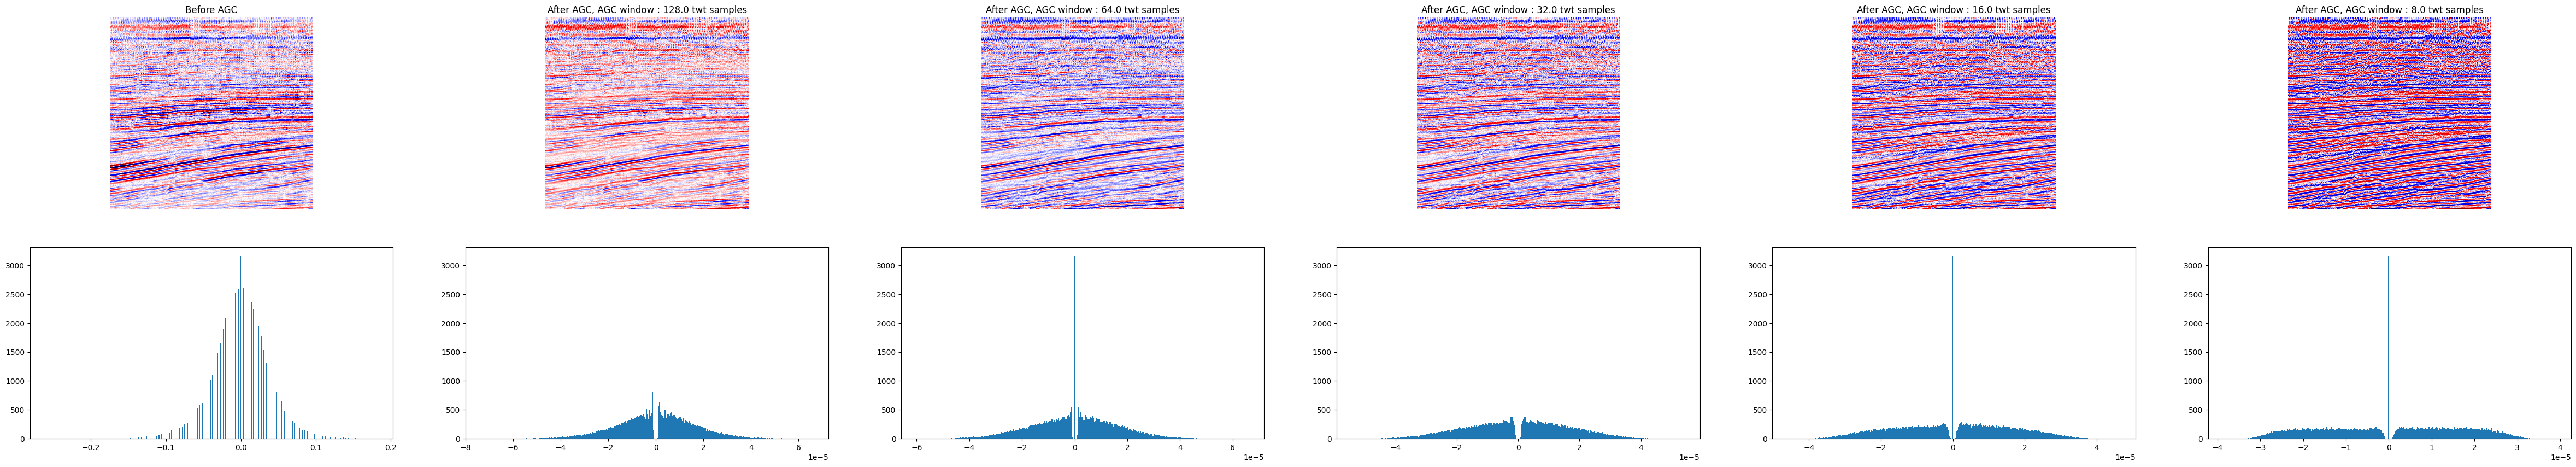

In [109]:
fig,ax = plt.subplots(ncols=len(agc_windows) + 1 , nrows= 2, figsize=(10 * (len(agc_windows) + 1), 10) )

for i in range(len(agc_windows) + 1) : 
    if i==0 : 
        plot_kwargs = dict(
            vmin = vmin_clip, 
            vmax = vmax_clip, 
            cmap='seismic'
        )
        ax[0,i].imshow(patch, **plot_kwargs)
        ax[0,i].set_title('Before AGC')
        ax[0,i].axis('off')

        data = np.reshape(patch,-1)
        ax[1,i].hist(data / data.shape[0], bins=500);



    else : 
        vmin = np.min(patch_agc[i-1])
        vmax = np.max(patch_agc[i-1])

        plot_kwargs = dict(
                vmin = vmin, 
                vmax = vmax, 
                cmap='seismic'
            )

        ax[0,i].imshow(patch_agc[i-1], **plot_kwargs)
        ax[0,i].set_title(f'After AGC, AGC window : {agc_windows[i-1]} twt samples')
        ax[0,i].axis('off')

        data = np.reshape(patch_agc[i-1],-1)
        ax[1,i].hist(data / data.shape[0], bins=500);

In [110]:
# Selecting agc window of 64 twt samples 

patch_agc_64 = patch_agc[1]

display(np.min(patch_agc_64), np.max(patch_agc_64))

-3.6774373019648814

4.053679648158852

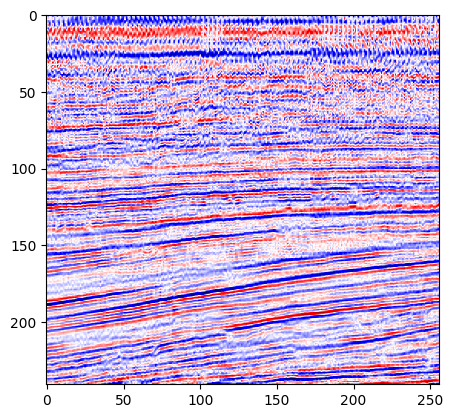

In [111]:
# Min max scaling to [-1,1]
scaler = np.max(np.abs(patch_agc_64))
patch_agc_64_scaled = patch_agc_64 / scaler

plot_kwargs = dict(
                vmin = np.min(patch_agc_64_scaled), 
                vmax = np.max(patch_agc_64_scaled), 
                cmap='seismic'
            )


plt.imshow(patch_agc_64_scaled, **plot_kwargs)

61696

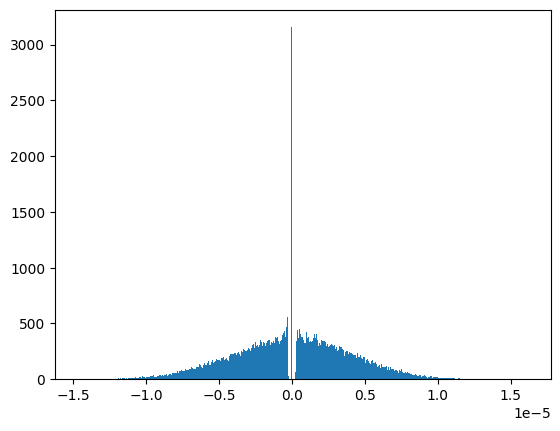

In [112]:
# plotting distribution of amplitudes 
data = np.reshape(patch_agc_64_scaled,-1)

display(data.shape[0])

plt.hist(data / data.shape[0], bins=500);